In [1]:
import matplotlib.pyplot as plt
from pot_correction import *
from uncertain_dp2 import *

In [2]:
import random
#random.seed(1)

In [3]:
DNA_LENGTH = 50           
READ_lENGTH = 35
READ_COUNT = 10

PROBABILISTIC_ALIGNMENT_BONUS = 2
NORMAL_ALIGNMENT_BONUS = 0.7

ALIGNMENT_BONUS = PROBABILISTIC_ALIGNMENT_BONUS

In [4]:
dna = generate_dna(DNA_LENGTH)
reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
#check_dna_distance_error_rate_suitable(dna, reads, alignment_bonus=ALIGNMENT_BONUS)

In [5]:
most_likely_restorer_error_rate(reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS)

0.14

In [6]:
r = reads[0]

In [7]:
print_read_intendet_errors(r, alignment_bonus=ALIGNMENT_BONUS)
print(r.original_text)
print(r.predicted_text)
print(r.uncertain_text)

     XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
TCAGGGACCGTCCGTTTACAAGTGGAAATCCACGT
TCACGGACGGTCCGTTAACAAGAAGATATCCACGT
[[0.0, 1.0, 0.0, 0.0], [0.31121538993238795, 0.055943573941882895, 0.48358715478771197, 0.14925388133801712], [0.5452114688900823, 0.0, 0.11210205413408543, 0.34268647697583243], [0.3328652091580263, 0.0, 0.37706691783864893, 0.29006787300332476], [0.2805089875054444, 0.15917151624170944, 0.15995497134059986, 0.4003645249122463], [0.0, 0.0, 0.3672271746658143, 0.6327728253341857], [0.43801502746204973, 0.0, 0.2269638493268567, 0.33502112321109356], [0.15385663582551223, 0.3029323152191514, 0.5432110489553363, 0.0], [0.0, 0.0, 0.46326869997189923, 0.5367313000281008], [0.0, 0.12895683940188488, 0.05649351051735093, 0.8145496500807642], [0.14809839548039652, 0.8151783209026277, 0.03672328361697571, 0.0], [0.0, 0.12410476679200998, 0.6810671044627672, 0.19482812874522276], [0.0055904325159114475, 0.0, 0.9944095674840886, 0.0], [0.0, 0.0, 0.0, 1.0], [0.06422364769478214, 0.64011

In [8]:
print(r.uncertain_text[0])
rounded_r = rounded_read(r,1)
most_likely_restorer(r.uncertain_text)  , most_likely_restorer(rounded_r.uncertain_text)
r.uncertain_text[0], rounded_r.uncertain_text[0]

[0.0, 1.0, 0.0, 0.0]


([0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0])

# Test the effect of different block-precisions on error-correction

In [9]:
# results = {}

# for M in range(1,20):
#     discrete_reads = [rounded_read(r,M) for r in reads]
#     #[print_read_intendet_errors(r,alignment_bonus=ALIGNMENT_BONUS) for r in discrete_reads]
#     corrected_reads = correct_reads_with_consens(discrete_reads, alignment_bonus=ALIGNMENT_BONUS, probabilistic=True)
#    results[M]=most_likely_restorer_error_rate(corrected_reads)

In [10]:
#results

In [11]:
#plt.bar(results.keys(), results.values())

In [12]:
import pandas as pd
import numpy as np


def compare_and_plot(read_correctors: list[t.Callable[[list[Read]],list[Read]]],*, names: list[str]=None,  iterations=4):
    if names is None:
        names = [str(i) for i in range(len(read_correctors))]

    all: list[list[float]] = [[] for _ in read_correctors]
    for _ in range(iterations):

        dna = generate_dna(DNA_LENGTH)
        reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]

        for j, corrector in enumerate(read_correctors):
            corrected_reads = corrector(reads)
            all[j].append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS))


    plt.bar(
        names,
        [np.mean(measurement_row) for measurement_row in all],
        yerr=[pd.Series(measurement_row).sem() for measurement_row in all],
        capsize=6
    )

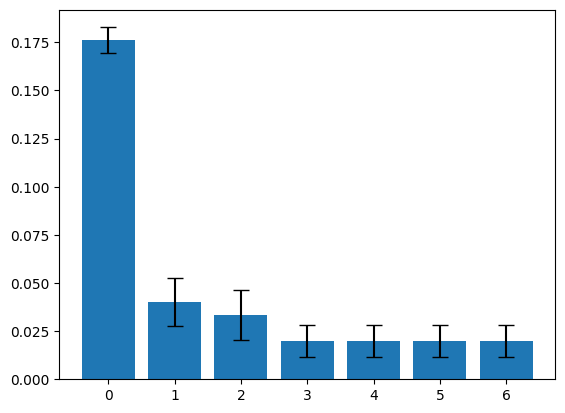

In [13]:
compare_and_plot(
    [lambda r:r, 
     lambda reads: correct_reads_with_consens(reads,probabilistic=False, alignment_bonus=NORMAL_ALIGNMENT_BONUS),
     lambda reads: correct_reads_with_consens(reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS, probabilistic=True)
     ]+[
        lambda reads: correct_reads_with_consens([rounded_read(r,M) for r in reads], alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS, probabilistic=True)
        for M in [1,2, 4, 100]
    ],
    iterations=6
)